# Capitulo 1. Introducción a Robust Python

## Robustes
Definición:
1. Tener o exibir fuerza o salud vigorosa
2. Tener o mostrar vigor, fuerza o firmeza
3. Fuertemente formado o construido
4. capaz de presentarse sin fallas bajo un pequeño número de condiciones


### La importancia de el código limpio

Tener un código limpio es fundamental para tener un código robusto, considera un aapuesta segura para cualquier proyecto significativo, Hay algunas prácticas específicas vinculadas para escribir código limpio, incluyendo:

* Organizar el código de forma adecuadamente granular
* Proveér buena documentación
* Nombrar tus variables/Funciones/Tipo de forma adecuada
* Mantener funciones cortas y simples

## ¿Cuál es su intención?

In [1]:
# Toma una receta de comida y cambia el número de servicios
# para ajustar cada ingrediente
# El prime elemento de una receta es el numero de servicios, y el resto
# de elementos (nombre, monto, unidades), tal como ("fluor",1.5,"cup)

def adjust_recipe(recipe, servings):
    new_recipe = [servings]
    old_serving = recipe[0]
    factor = servings / old_serving
    recipe.pop(0)
    while recipe:
        ingredient, amount, unit = recipe.pop(0)
        # solo usa números que serán facilmente medibles
        new_recipe.append((ingredient, amount*factor,unit))
        return new_recipe

In [2]:
def adjust_recipe(recipe, servings):
    old_servings = recipe.pop(0)
    factor = servings / old_servings
    new_recipe = {ingredient: (amount*factor, unit) for ingredient, amount, unit in recipe}
    new_recipe["servings"] = servings
    return new_recipe

In [3]:
class Recipe():
    pass

class Fraction():
    pass

def adjust_recipe(recipe, servings):
    """
    Take a meal recipe and change the number of servings
    :param recipe: a `Recipe` indicating what needs to be adusted
    :param servings: the number of servings
    :return Recipe: a recipe with serving size and ingredients adjusted
    for the new servings
    """
    # create a copy of the ingredients
    new_ingredients = list(recipe.get_ingredients())
    recipe.clear_ingredients()

    for ingredient in new_ingredients:
        ingredient.adjust_propoprtion(Fraction(servings, recipe.servings))
    return Recipe(servings, new_ingredients)

## Comunicación asyncrona

* descubribilidad: ¿Qué tan fácil fue encontrar esta información fuera de un flujo de trabajo normal?, ¿En qué medida es
efímero este conocimiento?, ¿Es fácil buscar la información?
* costo de mantenimiento: ¿Cuál es el grado de precisión de la información?, ¿Con qué frecuencia debe actualizarse?, ¿Qué
¿Qué ocurre si la información no está actualizada?
* costo de producción: ¿Cuánto tiempo y dinero se invirtió en producir la comunicación?

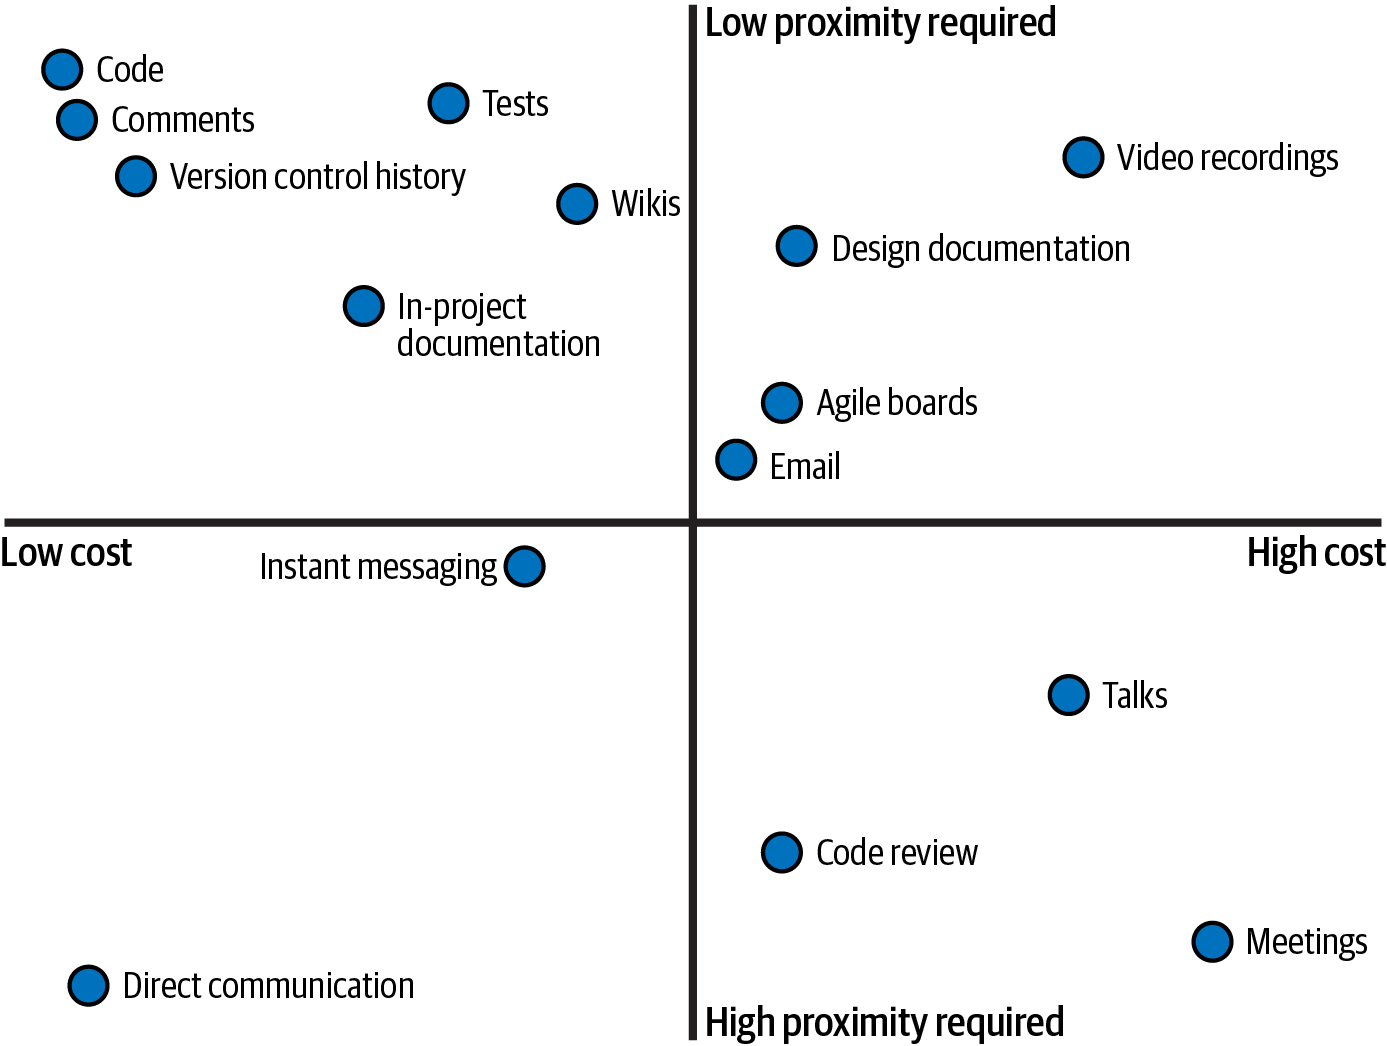

## Ejemplos de intención en Python

In [3]:
class Cookbook():
    def __init__(self) -> None:
        self.author = ''

### Collections

def create_author_count_mapping(cookbooks: list[Cookbook]):
    counter = {}
    for cookbook in cookbooks:
        if cookbooks.autor not in  counter:
            counter[cookbook.author] = 0
        counter[cookbook.author] += 1
    return counter

* String: An immutable collection of characters. The name of a cookbook would be a string.
* Generator: A collection to be iterated over, and never indexed into. Each element access is performed lazily, so it may take time and/or resources through each loop iteration. They are great for computationally expensive or infinite collections. An online database of recipes might be returned as a generator; you don’t want to fetch all the recipes in the world when the user is only going to look at the first 10 results of a search.
* Tuple: An immutable collection. You do not expect it to change, so it is more likely to extract specific elements from the middle of the tuple (either through indices or unpacking). It is very rarely iterated over. The information about a specific cookbook might be represented as a tuple, such as (cookbook_name, author, page count).
* Set: An iterable collection that contains no duplicates. You cannot rely on ordering of elements. The ingredients in a cookbook might be stored as a set.
* Dictionary: A mapping from keys to values. Keys are unique across the dictionary. Dictionaries are typically iterated over, or indexed into using dynamic keys. A cookbook’s index is a great example of a key to value mapping (from topic to page number.)

* frozenset: A set that is immutable.
* OrderedDict: A dictionary that preserves order of elements based on insertion time. As of CPython 3.6 and Python 3.7, built-in dictionaries will also preserve order of elements based on insertion of time.

* defaultdict: A dictionary that provides a default value if the key is missing. For example, I could rewrite my earlier example as follows:

In [5]:
from collections import defaultdict

def create_author_count_mapping(cookbooks=list[Cookbook]):
    counter = defaultdict(lambda: 0)
    for cookbook in cookbooks:
        counter[cookbook.autor] += 1
    return counter

* Counter: A special type of dictionary used for counting how many times an element appears. This greatly simplifies our above code to the following:

In [6]:
from collections import Counter

def create_author_count_mapping(cookbooks=list[Cookbook]):
    return Counter(book.autor for book in cookbooks)

### Iteraciones

In [10]:
text = "This"
index = 0
while index < len(text):
    print(text[index])
    index += 1

T
h
i
s


In [11]:
# More Pythonic (code written in an idiomatic style that aims to emphasize simplicity and is recognizable to most Python developers):
for character in text:
    print(character)

T
h
i
s
